# Machine Learning

<br>

## Coursera Machine Learning with Andrew Ng
[https://www.coursera.org/learn/machine-learning/home/welcome](https://www.coursera.org/learn/machine-learning/home/welcome)
- [Unit 1 - Linear Regression](#unit1)
- [Unit 2 - Multivariate Linear Regression](#unit2)
- [Unit 3 - Logistic Regression](#unit3)
- [Unit 7 - SVM](#unit7)
- [Unit 8 - Unsupervised Learning & Dimension Reduction](#unit8)
- [Unit 9 - Anomaly Detection](#unit9)
___

<br>
## Python Machine Learning
[https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning](https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning)
- Decision Trees and Ensemble Methods
- Natural Language Processing (NLP)
___

<br>
## Analytics Vidhyra
https://www.analyticsvidhya.com/blog/
- [Regularization](#reg)

<br>

# Coursera Machine Learning

*"A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E." - Tom Mitchell*

<a id="unit1"></a>

# Unit 1

## Supervised vs unsupervised learning

- **Supervised learning:** given an input dataset and corresponding output, train computer to make predictions. Two types:
 1. *Regression* - predicts a continuous output
 1. *Classification* - predicts a discrete output
 <br><br>
- **Unsupervised learning:** given dataset with no output, derive structure from data, typically done with clustering.

## Linear regression with one variable

Univariate linear regression is a type of supervised learning used to predict a single output value $y$ from a single input value $x$, with a given number of examples $m$. The $i^{th}$ training example is represented by $(x^{(i)}, y^{(i)})$.

We model the dataset/system with a ***hypothesis function*** $h$ that maps the input variable $x$ to the output variable $y$. For univariate linear regression,

$$h_{\theta}(x) = \theta_{0} + \theta_{1}x$$

To calculate the ***parameters*** $\theta s$ in the hypothesis function, choose values for the parameters so that $h_{\theta}(x)$ is close to the given actual output values $y$. This can be achieved by minimizing the quantity,

$$\min_{\theta_{0}, \ \theta_{1}} \ \frac{1}{2m} \sum_{i=1}^{m} \ [h_{\theta}(x^{(i)}) - y^{(i)}]^{2}$$
where,
$$ h_{\theta}(x^{(i)}) = \theta_{0} + \theta_{1}x^{(i)} $$

The term inside the summation is called the ***squared error cost function*** and is typically written,

$$ J(\theta_{0}, \theta_{1}) = \frac{1}{2m} \sum_{i=1}^{m} \ [h_{\theta}(x^{(i)}) - y^{(i)}]^{2} $$

So the idea is to use an algorithm that can select values for the parameters that minimize the value of the cost function.

## Gradient descent

Algorithm used for function minimization, for univariate linear regression, this method will calculate values for $\theta_{0}$ and $\theta_{1}$ that minimize $J$.

**Basic procedure:**
1. Start with a guess for the value of $\theta_{0}$ and $\theta_{1}$.
1. Calculate $J$, then select new values of $\theta_{0}$ and $\theta_{1}$ until $J$ is minimized.

**Definition:**
$$ repeat \ until \ convergence: \  \theta_{j} := \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta_{0}, \theta_{1}) \ \ for \ j=0 \ and \  j=1  $$

**Notes:**

Gradient descent uses ***simultaneous update*** where the right hand side of the equation is calculated for all $js$ then all $js$ are updated at the same time before performing the next iteration of gradient descent. The parameter $\alpha$ is defined as the ***learning rate***.

After each iteration, the current value of $\theta$ moves close to the minimum of $J$ as a function of $\theta$.

Selecting $\alpha$ is important because if the value is too large, the update at each step may pass over the actual minimum $J$ and fail to find the minimum. If $\alpha$ is too small, the process will take a long time to complete.

When all training examples are used in each step, the process is called ***batch gradient descent***.

**For univariate linear regression:**

The derivative of the cost function $J$ relative to the parameters $\theta$ yields ( remember $h_{\theta}(x^{(i)}) = \theta_{0} + \theta_{1}x^{(i)}$ ),
$$ \theta_{0} := \theta_{0} - \alpha  \frac{1}{m} \sum_{i=1}^{m} \ [h_{\theta}(x^{(i)}) - y^{(i)}] $$
$$ \theta_{1} := \theta_{1} - \alpha  \frac{1}{m} \sum_{i=1}^{m} \ [h_{\theta}(x^{(i)}) - y^{(i)}] \cdot x^{(i)} $$

<a id="unit2"></a>

# Unit 2

## Multivariate linear regression

Instead of one input variable $x$ there are now $n$ input variables or features, $x_{0}, x_{1}, ..., x_{n}$. Thus the hypothesis function becomes,

$$ h_{\theta}(x) = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + ... + \theta_{n} x_{n} $$

where by convention, $x_{0} = 1$. This expression can be simplified by using column vectors to represent $x$ and $\theta$ in which case,

$$ x = \begin{pmatrix}x_{0}\\x_{1}\\.\\x_{n}\end{pmatrix} , \qquad \theta = \begin{pmatrix}\theta_{0}\\\theta_{1}\\.\\\theta_{n}\end{pmatrix} , \qquad h_{\theta}(x) = \theta^{T} x \ = (\theta_{0} \ \theta_{1} \ ... \ \theta_{n})\begin{pmatrix}x_{0}\\x_{1}\\.\\x_{n}\end{pmatrix}$$

## Multivariate gradient descent

Instead of two update rules for $\theta_{0}$ and $\theta_{1}$ there are now $n$ update rules for each feature which can be written,

$$ \theta_{j} := \theta_{j} - \alpha  \frac{1}{m} \sum_{i=1}^{m} \ [h_{\theta}(x^{(i)}) - y^{(i)}] \cdot x_{j}^{(i)} $$

It is import to make sure the features are on a similar scale so that they converge at a similar rate. One means of doing this is to use ***feature scaling***; subtract the mean value then divide by the maximum minum minimum value or the standard deviation of the feature. Ideally, features should be in the range [-1,1].

**How to choose learning rate:**

First, to ensure gradient descent is working correctly, plot the minimum value of $J(\theta)$ as a function of the number of iterations of gradient descent. The curve should be decreasing with a slope that flattens out at higher iterations to indicate it is approaching convergence.

If the plot does not decrease monotonically, then it is likely that $\alpha$ is set too large and should be decreased. Typical range of values to try: 

$$ \alpha = \ ..., 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, ... $$

If convergence takes a long time, it is likely that $\alpha$ is set too small and must be increased.

## Polynomial regression

The hypothesis function becomes,

$$ h_{\theta}(x) = \theta_{0} + \theta_{1} x + \theta_{2} x^{2} + ... + \theta_{n} x^{n} $$

where $n$ can also take on values between 0 and 1.

Here, feature scaling becomes very important because of the power variation between features in the hypothesis function.

<a id="unit3"></a>

# Unit 3

## Logistic regression

In classification problems it often occurs that the output variable $y \in \{0,1\}$, i.e., there is a positive or negative outcome this is called a ***binary classification problem***.

If using linear regression to predict either 0 or 1 values it may seem reasonable to select predictions greater than 0.5 equal to 1 and those below equal to 0. However data points that may not be expected to change the prediction mechanism can alter the linear regression of the data and significantly change the output of the hypothesis function.

Instead it is better to use a ***sigmoid function*** rather than a linear function to represent the hypothesis,
$$ h_{\theta}(x) = g(\theta^{T} x) = \frac{1}{1 + e^{-\theta^{T} x}} $$

<img src="sigmoid.png" width="400">


Logistic regression returns a probability that the hypothesis function outputs to 0 or 1 such that,

$$ P(y = 0  \ | \ x; \theta) + P(y = 1 \ | \ x; \theta) = 1 $$

The reasonable choice for returning an output of 1 is then, $ h_{\theta}(x) \ge 0.5 $ or $\theta^{T} x \ge 0$, and an output of 0 when $ h_{\theta}(x) \lt 0.5 $ or $\theta^{T} x \lt 0$.

Thus the ***decision boundary***, the line that separates $y=0$ and $y=1$, occurs where $\theta^{T} x = 0$.

## Cost function for logistic regression

The cost function for linear regression (based on the sum of the squared error) cannot be used here as it would be non-convex and not guaranteed to converge to the global minima when using gradient descent.

Instead we want a function that behaves appropriately,

$$ if \ h_{\theta} (x) = 0, \ predict \ P(y=1 \ | \ x;\theta) = 0, so \ Cost \rightarrow \infty $$
$$ if \ h_{\theta} (x) = 1, \ predict \ P(y=1 \ | \ x;\theta) = 1, so \ Cost \rightarrow 0 $$
$$ if \ h_{\theta} (x) = 1, \ predict \ P(y=0 \ | \ x;\theta) = 0, so \ Cost \rightarrow \infty $$
$$ if \ h_{\theta} (x) = 0, \ predict \ P(y=0 \ | \ x;\theta) = 1, so \ Cost \rightarrow 0 $$

A good selection then given the sigmoid shape of the hypothesis function is,

$$ Cost \ (h_{\theta} (x), y) = \begin{cases} -\log{h_{\theta} (x)}  & \mbox{if } y = 1 \\ -\log{(1 - h_{\theta} (x))} & \mbox{if } y = 0 \end{cases} $$

Since $y = 0$ or $1$ always, this multipart definition can be written as a single expression,

$$ Cost \ (h_{\theta} (x), y) = -y \log{h_{\theta} (x)} - (1-y) \log{(1 - h_{\theta} (x))} $$

And,

$$ J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} y^{(i)} \log{h_{\theta} (x^{(i)})} + (1-y^{(i)}) \log{(1 - h_{\theta} (x^{(i)}))} $$

This expression can be derived from maximum likelihood estimation theory.

## Gradient descent for logistic regression

To minimize $J(\theta)$ by calculating the partial derivative gives,

$$ \theta_{j} := \theta_{j} - \alpha  \frac{1}{m} \sum_{i=1}^{m} \ [h_{\theta}(x^{(i)}) - y^{(i)}] \cdot x_{j}^{(i)} $$

which is identical to linear regression, the only difference being the form of the hypothesis function $h_{\theta}(x)$.

## Multiclass logistic regression

For systems that have more output options than 0 and 1 as in binary classification. It is possible to iteratively apply binary classification using a ***one-vs-all*** procedure,

$$ h_{\theta}^{(i)} (x) = P(y=i \ | \ x;\theta) \qquad (i=1,2,3,...) $$

Each iteration returns the probability that $y=i$. So for each example, the predicted output is,

$$ \max_{i} h_{\theta}^{(i)} (x) $$

## Regularization to address overfitting

One method to reduce variance and overfitting is to penalize certain features and make the corresponding parameters very small so that they have little influence in determining the value of the cost function. This can be achieved by adding the product of the square of the features with a large number,

$$ \min_{\theta} \frac{1}{2m} \sum_{i=1}^{m} \ [h_{\theta}(x^{(i)}) - y^{(i)}]^{2} + \lambda \sum_{j=1}^{n} \theta_{j}^{2} $$

If the ***regularization parameter*** $\lambda$ is set too high, the solution may end up underfitting.

Note that for linear regression, $\theta_{0}$ is not regularized, i.e., it is not included in the summation.

## Regularization and linear regression

The gradient descent formula becomes,

$$ \theta_{j} := \theta_{j} (1 - \alpha \frac{\lambda}{m}) - \alpha \frac{1}{m} \sum_{i=1}^{m} \ [h_{\theta}(x^{(i)}) - y^{(i)}] \cdot x_{j}^{(i)} $$

## Regularization and logistic regression

The cost function is,

$$ J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} [-y^{(i)} \log{h_{\theta} (x^{(i)})} - (1-y^{(i)}) \log{(1 - h_{\theta} (x^{(i)}))}] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_{j}^{2} $$

And the gradient descent formula is identical to that for linear regression with the exception that the hypothesis function $h_{\theta}(x)$ is different,

$$ \theta_{j} := \theta_{j}  - \alpha \Big[ \Big( \frac{1}{m} \sum_{i=1}^{m} \ [h_{\theta}(x^{(i)}) - y^{(i)}] \cdot x_{j}^{(i)} \Big) + \frac{\lambda}{m} \theta_{j} \Big] $$

<a id="unit4"></a>

# Unit 7

## Support vector machines

In SVMs, the optimization objective is to maximize the ***margin***. The margin is defined as the distance between the separating hyperplane (decision boundary) and the training samples that are closest to this hyperplane, which are the so-called ***support vectors***. The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting.

SVM can be derived by modifying logistic regression. Consider the cost function written as,

$$ \min_{\theta} \frac{1}{m} \sum_{i=1}^{m} y^{(i)} {cost}_{(y=1)} \Big( \theta^{T} x^{(i)} \Big) + 
(1-y^{(i)}) {cost}_{(y=0)} \Big( \theta^{T} x^{(i)} \Big) + \frac{\lambda}{2m} \sum_{j=0}^{n} \theta_{j}^{2} $$

Drop the use of $m$ and define regularization as $C\cdot A + B$ instead of $A + \lambda \cdot B$ such that $C = 1/\lambda$,

$$ \min_{\theta} C \sum_{i=1}^{m} y^{(i)} {cost}_{(y=1)} \Big( \theta^{T} x^{(i)} \Big) + 
(1-y^{(i)}) {cost}_{(y=0)} \Big( \theta^{T} x^{(i)} \Big) + \frac{1}{2} \sum_{j=0}^{n} \theta_{j}^{2} $$

The portions of the cost function $cost \ ( \theta^{T} x^{(i)} )$ require,
$$ If \ y=1, \ \theta^{T} x^{(i)} \ge 1 $$
$$ If \ y=0, \ \theta^{T} x^{(i)} \le -1 $$

To simplify the derivation, assume a large regularization parameter $C$ which simplifies the optimization objective to,

$$ \min_{\theta} \frac{1}{2} \sum_{j=0}^{n} \theta_{j}^{2} $$

The dot product of two vectors can be written as the product of the projection of one vector on to the other times its norm,

$$ \theta^{T} x^{(i)} = p^{(i)} \cdot \| \theta \| $$

Thus minimizing $\theta$ is equivalent to choosing $\theta$ that maximizes $p^{(i)}$. This is why SVM is called *large margin optimization* or why SVM selects hyperplanes that maximize the separation between classes.

## Kernels

Create landmarks in feature space and define a similarity function $f$ that relates how similar example $x$ is to each landmark $l$. A function that works well to describe this relationship is the *Gaussian or radial basis function*,

$$ f_{i}(x) = \exp{- \frac{\|x - l^{(i)} \|^{2}}{2\sigma^{2}}} $$

The hypothesis function for *three* features becomes,

$$ h_{\theta}(x) = \theta_{0} + \theta_{1} f_{1} + \theta_{2} f_{2} + \theta_{3} f_{3} $$

And we predict $y=1$ if,

$$ h_{\theta}(x) = \theta^{T} f = \theta_{0} + \theta_{1} f_{1} + \theta_{2} f_{2} + \theta_{3} f_{3} \ge 0 $$

How are the landmarks determined? For each example in the training set, set landmarks at the location of the training examples so in the end there are $m$ total examples.

Now the cost function becomes,

$$ \min_{\theta} C \sum_{i=1}^{m} y^{(i)} {cost}_{(y=1)} \Big( \theta^{T} f^{(i)} \Big) + 
(1-y^{(i)}) {cost}_{(y=0)} \Big( \theta^{T} f^{(i)} \Big) + \frac{1}{2} \sum_{j=1}^{m} \theta_{j}^{2} $$

Remember that there are $m$ features and thus $m$ parameters $\theta$,

$$ \theta^{T} f = \theta_{0} + \theta_{1} f_{1} + \theta_{2} f_{2} + ... + \theta_{m} f_{m} $$

The value of $\sigma$ used in the similarity function require tuning. Smaller values increase the influence or reach of the training examples leading to a softer boundary. Larger values will cause the boundary to tightly trace all but 1 of the classes, which can lead to generalization error on test data.

<a id="unit8"></a>

# Unit 8

## Unsupervised learning: K-means clustering

Two step algorithm that is repeated until convergence:
1. Cluster assignment
1. Centroid calculation

Cluster centroids are randomly initialized before the algorithm begins. Cluster assignment of each example is based on Euclidean distance between example and cluster centroids. This is reflected in the cost function of the optimization objective also called the ***inertia***,

$$ \min_{c, \ \mu} \ \frac{1}{m} \sum_{i=1}^{m} \| x^{(i)} - \mu_{c^{(i)}} \|^{2} $$

where $c$ is the cluster index and $\mu$ is the location of the cluster centroid.

### Initializing cluster centroids:

Different choices of initialization can yield different results, the solution of k-means may converge to a local optima. To prevent this from occurring:

1. Randomly select centroids to be specific training examples. 
1. Run k-means (optimization objective) and minimize cost function.
1. Repeat steps 1 and 2 (perhaps 100) and select the k-means results that have the lowest cost.

### Choosing number of clusters:

Most common method is to select number of clusters manually based on some downstream purpose (i.e., market segmentation such as t-shirt sizing).

**Elbow method**: Plot the cost function for various number of clusters. Select the solution that corresponds to the location where the plot flattens out. It is possible that this method may not work.



## Dimensionality reduction: Principal component analysis

It may be possible to reduce the number of features in the training set without sacrificing significant model performance.

**Algorithm:**
1. Compute covariance matrix from the standardized dataset,
$$ \Sigma = \frac{1}{m} \sum_{i=1}{n} (x^{(i)})(x^{(i)})^{T} $$
1. Compute eigenvectors of $\Sigma$ using singular value decomposition,
$$ U, \ S, \ V = svd(\Sigma) $$ <br>

Here the first $k$ column vectors of $U$ will transform the $n$ dimensional space data to the reduced $k$ dimensional space, $z = U^{T} x.$

To recover approximate representations of the original data from the compressed/transformed data, $x_{approx} = U z.$

The basis of the transformed datasets are then the eigenvectors of the covariance matrix, which are called *principal components*.

<a id="unit9"></a>

# Unit 9

## Anomaly detection

Assume an unlabeled dataset that contains clean and anomalous data where each example $x^{(i)}$ is $x \in \mathbb{R}^{n}$. Then apply multivariate density estimation to each example (assuming features are independent),

$$ p(x) = p(x_{1}; \ \mu_{1}, \sigma_{1}^{2}) \cdot p(x_{2}; \ \mu_{2}, \sigma_{2}^{2}) \cdot \ldots \cdot p(x_{n}; \ \mu, \sigma_{n}^{2}) = \prod_{j=1}^{n} \ p(x_{j}; \mu_{j} \sigma_{j}^{2}) $$

### Algorithm:

1. Choose features that may be indicative of anomalous examples.
1. Fit parameters for all $n$ features $\mu_{n}$, $\sigma_{n}^{2}$,
$$ \mu_{j} = \frac{1}{m} \sum_{i=1}^{m} x_{j}^{(i)}, \quad \sigma_{j}^{2} = \frac{1}{m} \sum_{i=1}^{m} \big(x_{j}^{(i)} - \mu \big)^{2} $$
1. Given new example $x$, compute multivariate density estimate of all the relevant features of this example $p(x)$,
$$ p(x) = \prod_{j=1}^{n} \ p(x_{j}; \mu_{j} \sigma_{j}^{2}) = \prod_{j=1}^{n} \frac{1}{\sqrt{2 \pi} \sigma_{j}} \exp - \Big( \frac{(x_{j} - \mu_{j})^2}{2 \sigma_{j}^{2}} \Big) $$
1. Compare $p(x) < \epsilon$, if true then this example $x$ is an anomaly.

<br>
### Pseudo-supervised learning approach:

Create dataset with labeled anomalous examples ($y=0$ if normal, $y=1$ If anomalous) and divide into CV and test sets.

1. Fit parameters for all $n$ features $\mu_{n}$, $\sigma_{n}^{2}$ for training set.
1. Evaluate $p(x)$ for each training example and predict $y=1$ if $p(x) < \epsilon$ and $y=0$ if $p(x) \ge \epsilon$.
1. Use a good unbalanced class metric such as F1-score to evaluate model on CV/test set.
1. Can use CV set to select appropriate $\epsilon$ and features to include in model before running on test set.

<br>
### Feature selection:

1. ***Check if features are Gaussian*** (not strictly necessary) by plotting distribution. If feature has log-normal distribution, replace feature $x$ with $\log{x}$ or $\log{x + c}$. If the feature has an exponential distribution, can adjust feature distribution with power: $x^{1/p}$.
1. ***Use error analysis*** so that $p(x)$ is small for anomalous examples and large for normal examples. Choose quick algorithm, run it, refine it so that anomalous values that are predicted to be normal are no long misclassified.

<br>
### Multivariate gaussian distribution:

1. Fit model $p(x)$ by calculating mean average $\mu$ and covariance $\Sigma$,
$$ \mu_{j} = \frac{1}{m} \sum_{i=1}^{m} x_{j}^{(i)}, \quad \Sigma = \frac{1}{m} \sum_{i=1}^{m} \big(x^{(i)} - \mu \big) \big(x^{(i)} - \mu \big)^{T} $$
1. Given a new example $x$, compute,
$$ p(x) = \frac{1}{(2\pi)^{n/2} |\Sigma|^{1/2}} \ \exp{\Big( -\frac{1}{2}(x-\mu)^{T} \Sigma^{-1} (x-\mu) \Big)} $$
1. Classify as an anomaly if $p(x) < \epsilon$.

This method does not assume the features are independent (i.e., the axes of the multivariate Gaussian distribution are orthogonal, for 2D this means the Gaussian top view is an ellipse) as was done with the original model. Another way of describing this relationship is to say the original model is the special case where the covariance matrix is diagonal.

### Separable model vs multivariate:

1. Multivariate will capture correlations between features where separable model would new features to capture these relationships.
1. Separable model is computationally cheaper since the matrix inversion $\Sigma^{-1}$ is not needed.
1. If number of examples $m$ is small, separable model can be used where as multivariate approach requires $m>n$ so that covariance matrix $\Sigma$ is invertible. Also if there are linearly-dependent features then $\Sigma$ is non-invertible, so remove the feature causing the redundancy.

<br><br>
___

# Python Machine Learning

## Parametric vs Nonparameteric classifiers

Using parametric models, we estimate parameters from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore. In contrast, nonparametric models can't be characterized by a set of parameters, and the number of parameters grows with the training data.

### Parametric
- Perceptron
- Logistic regression
- Linear SVM

### Nonparametric
- Decision trees/random forests
- Kernel SVM
- KNN

## Decision Trees

Additional reference:<br>
[http://stackoverflow.com/questions/1859554/what-is-entropy-and-information-gain](http://stackoverflow.com/questions/1859554/what-is-entropy-and-information-gain)

Decision tree classifiers make predictions by asking a series of questions. The questions to ask are determined by data features. The idea is to find the feature that best splits the target class into the purest possible children nodes (ie: nodes that don't contain a mix of both classes, rather pure nodes with only one class). This is achieved by splitting the data at each node in order to maximize the ***information gain ratio***,

$$ \max \ IG(D_{p}, f) = I(D_{p}) - \sum_{j=1}^{m} \frac{N_{j}}{N_{p}} I(D_{j}) $$

Here $f$ is the feature to perform the split, $D_{p}$ and $D_{j}$ are the dataset of the parent and $j$th child node, $N_{p}$ and $N_{j}$ are the number of examples of the parent and $j$th child node, $I$ is the impurity measure. Impurity is the "opposite" of information.

Information gain ratio biases the decision tree against considering attributes with a large number of distinct values. So it solves the drawback of information gain—namely, information gain applied to attributes that can take on a large number of distinct values might learn the training set too well.

The information gain is simply the difference between the impurity of the parent node and the normalized sum of the child node impurities. The lower the impurity of the child nodes, the larger the information gain.

To improve computational performance, scikit-learn uses binary decision trees,

$$ IG(D_{p}, f) = I(D_{p}) - \sum_{j=1}^{m} \frac{N_{left}}{N_{p}} I(D_{left}) - \frac{N_{right}}{N_{p}} I(D_{right})$$

The common ***impurity measures*** are ***Gini impurity***, ***entropy***, and the ***classification error***.
1. Entropy maximizes the mutual information in a tree. If $p(i|t)$ is the proportion of examples that belong to class $i$  for node $t$, entropy is 0 if $p(i=1|t)=1$ or $p(i=0|t)=0$ and entropy is 1 if $p(i=1|t)=0.5$ and $p(i=0|t)=0.5$.
1. Gini impurity can be understood as a criterion to minimize the probability of misclassification. Similar to entropy, Gini is maximized if the classes are perfectly mixed.
1. In practice, both Gini and entropy produce similar results.
1. Classification error is a useful criterion for pruning but not recommended for learning.

*Feature scaling is not necessary for building decision trees.*

### Prediction probability

Probabilities are calculated from a frequency vector that is created for each node at training time. The vector collects the frequency values of each class label computed from the class label distribution at that node. Then the frequencies are normalized so that they sum up to 1.

## Random forest

Random forests are an *ensemble* of decision trees, *weak learners* that are combined together to form a strong learner.

### Algorithm:
1. Draw a random ***bootstrap*** sample of $n$ examples.
1. Grow a decision tree from the bootstrap sample,
 1. Randomly select $d$ features without replacement.
 1. Split the node using the $d$ feature that provides according to the optimization objective, i.e., maximizing the information gain ratio.
1. Repeat steps 1 and 2 $k$ times.
1. Aggregrate the predictions be each of the $k$ decision trees by returning a ***majority vote*** (i.e., the class predicted by the most estimators).

Typically, the hyperparameter most in need of tuning is the number of trees to use, $k$. Additionally, the parameters $n$ and $d$ can also be tuned.

## Bagging - building an ensemble from bootstrap samples

Rather than using the same training set and taking a majority vote to predict a class, bagging draws bootstrap examples (random samples with replacement) from the training set. One example is random forests (with the exception that random forests also select a random number of features to fit the individual trees).

## Boosting of weak learners (Adaboost)

Here, the ensemble consists of weak learners that have only a slight performance advantage over random guessing such as a decision tree stump. To improve performance of the ensemble, weak learners are applied to misclassified training examples, boosting the performance for examples that are difficult to classify.

### Algorithm summary:
1. Draw a random subset of training samples $d_{1}$ without replacement from the training set and train a weak learner $c_{1}$.
1. Draw a second random subset without replacement $d_{2}$ and add 50% of the misclassified examples from $d_{1}$ to train a new weak learner $c_{2}$.
1. Find the training examples $d_{3}$ on which $c_{1}$ and $c_{2}$ disagree to train a new weak learner $c_{3}$.
1. Combine the output of $c_{1}$, $c_{2}$, and $c_{3}$ via majority voting.

## Gradient boosting

Gradient tree boosting is a generalization of boosting to apply an arbitrary differentiable loss function. Like other boosting approaches it combines weak learners to form a strong learner in iterative fashion.

Typically, the process begins with a weak model that predicts the mean of $y$. At successive stage of boosting $1 \le m \le M$, the model $F_m(x)$ is replaced with a better model $F_{m+1}(x) = F_{m}(x) + h(x)$. The estimator $h(x)$ is calculated from the residual,

$$ h(x) = y - F_{m}(x) $$

Here the objective function is to minimize $h(x)$, i.e., the new weak learner introduced will fit $h(x)$ to $y - F_{m}(x)$. Instead of calculating the gradient of the loss function $L(y,F_{m}(x)-h(x))$ to find the parameters to minimize $h(x)$, we fit a decision tree. So all the parameters of the decision tree must be computed. Typically one tree at a time is introduced.

### Algorithm overview
1. Fit an initial ensemble model
$$ F(x) = \sum_{m=1}^{M} \gamma_{m} h_{m}(x) $$ 
1. In each stage, introduce a weak learner to compensate the shortcomings of existing weak learners.


## Natural Language Processing (NLP)

### Bag-of-words

This technique represents text as numerical feature vectors.

1. Create a ***vocabulary*** of unique ***tokens*** (such as words) from the documents (examples).
1. Construct a ***feature vector*** from each document that contains the counts of how often each token (word) appears in each document (example). These feature vectors tend to be sparse.

One examples in scikit-learn is the `CountVectorizer`, each index in the feature vector corresponds to an integer count in the dictionary. These values are called ***raw term frequencies***, $tf(t,d)$ - the number of times a term $t$ occurs in document $d$.

Another example is the `HashingVectorizer` which uses a hashing function with a specified number of bins that represent tokens. This approach can result in smaller and easier to compute models due to the use of hashing for token lookup and restricting the total number of tokens. However it is not possible to invert to return importance of individual terms and there is no idf.

Typically, words are used as tokens however it also possible to generate ***n-grams***, a contiguous sequence of 1 or more words, letters, or symbols.

Term frequency of appearance is often not the most useful information. It is often necessary to downweight frequently occurring terms in the feature vectors with a technique called ***term frequency-inverse document frequency***, 

$$ tf\mbox{-}idf(t,d) = tf(t,d) \times idf(t,d) $$

The inverse document frequency is,

$$ idf(t,d) = \log{\frac{n_d}{1+df(t,d)}} $$

Where $n_d$ is the number of documents and $df(t,d)$ is the number of documents $d$ that contain term $t$. Using 1 in the denominator assigns a non-zero value to terms that appear in all examples (documents) and the $\log$ function ensures that low document frequencies are not given too much weight.

The implementation of `TfidfTransformer` in scikit-learn uses $1+n_d$ in the numerator of the idf term and the full tf-idf equation is $ tf\mbox{-}idf(t,d) = tf(t,d) \times \big( idf(t,d) + 1 \big) $. In addition, each feature vector is normalized by its L2-norm to have length 1.

It is possible to apply dimensionality reduction of the sparse matrices generated by vectorization using `TruncatedSVD` which is applied to the training data directly rather than the covariance matrix. When used on term-count or tf-idf data, this technique is known as Latent Semantic Analysis (LSA).

## Processing documents into tokens

One common method to *tokenize* a document is to split it into words based on whitespace characters.

***Stemming*** involves breaking down a word into its root form so that similar words can be mapped to the same stem. This is implemented with the Natural Language Toolkit (NLTK) for Python.

***Lemmatization*** aims to obtain the canonical (grammatically correct) forms of individual words. However this process is more computationally intense and it has been observed that stemming and lemmatization have little impact on the performance of text classification.

***Stop-words*** are very common words that appear frequently in texts but are unlikely to have any useful information, such as *is*, *and*, *has*, etc. These words can be removed with the NLTK and removing them can be useful especially when working with raw or normalized term frequencies rather than tf-idf.

<a id="reg"></a>

____
# Regularization

References:<br>
http://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
____

## Overview

Given a dataset, fit a polynomial function using linear regression.

In [17]:
# import libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

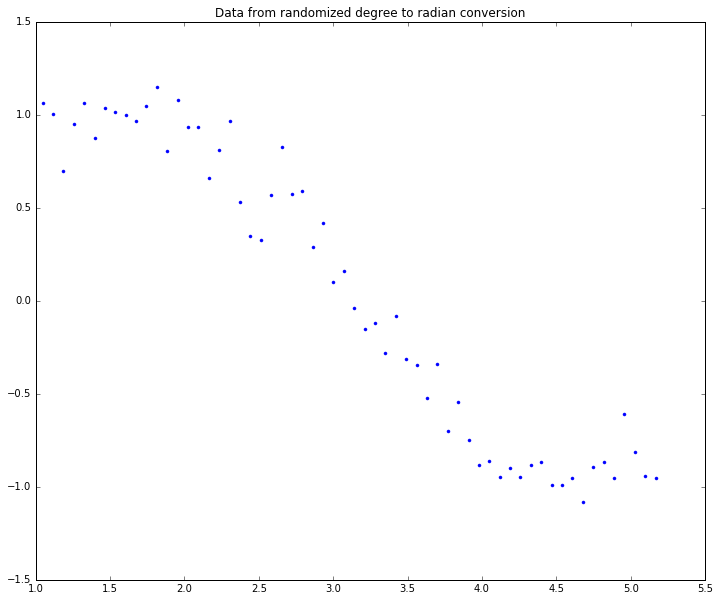

In [20]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
_ = plt.plot(data['x'],data['y'],'.')
_ = plt.title('Data from randomized degree to radian conversion')

In [37]:
# estimate data using polynomial regression

for i in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
print(data.shape)
data.head()

(60, 16)


,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1,1.1,1.1,1.1,1.2,1.3,1.3,1.4,1.4,1.5,1.6,1.7,1.7,1.8,1.9,2
1,1.1,1,1.2,1.4,1.6,1.7,1.9,2.2,2.4,2.7,3,3.4,3.8,4.2,4.7,5.3
2,1.2,0.7,1.4,1.7,2,2.4,2.8,3.3,3.9,4.7,5.5,6.6,7.8,9.3,11,13
3,1.3,0.95,1.6,2,2.5,3.1,3.9,4.9,6.2,7.8,9.8,12,16,19,24,31
4,1.3,1.1,1.8,2.3,3.1,4.1,5.4,7.2,9.6,13,17,22,30,39,52,69


In [13]:
from sklearn.linear_model import LinearRegression

def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

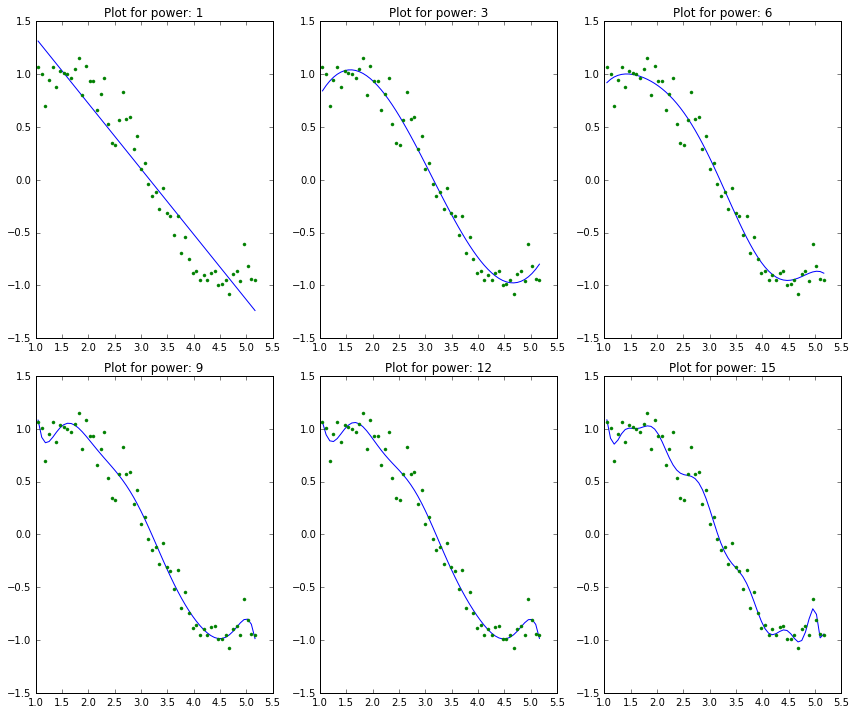

In [38]:
#Initialize a dataframe to store the results

col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_power_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [39]:
#Set the display format to be scientific for ease of analysis

pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_power_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_power_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_power_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_power_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_power_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_power_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_power_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_power_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_power_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_power_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


Clearly the **size of the parameters increases dramatically with model complexity**. Larger parameters put more emphasis on those features, i.e., that particular features becomes a good predictor for the outcome. The large parameters on the higher order features force the estimator to closely match small deviations from the general trend which increases model complexity but decreases generalizability.

## Ridge regression

The objective function (to be minimized) is modified to prevent the higher order features from acquiring inappropriately large parameters (during minimization) that can lead to overfitting and overly-complex estimators.

*Min Objective = Residual sum of squares + $\alpha$ $\cdot$ Sum of square of parameters*

Note: residual sum of squares is the same as the sum of squared residuals.

In [31]:
from sklearn.linear_model import Ridge

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

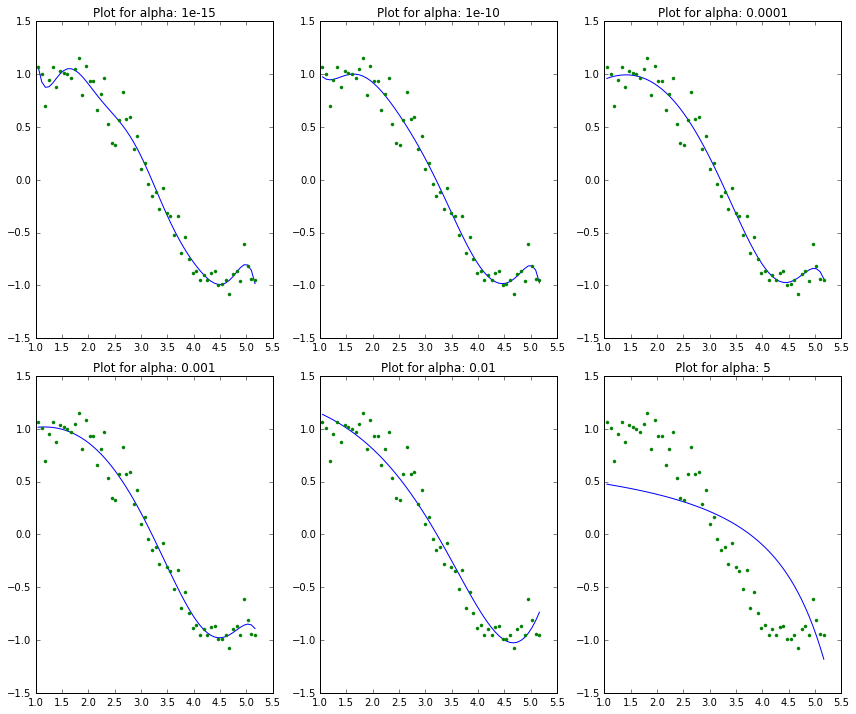

In [32]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [33]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,95,-3e+02,3.8e+02,-2.4e+02,66,0.96,-4.8,0.64,0.15,-0.026,-0.0054,0.00086,0.00022,-5.5e-05,3.9e-06,-6.9e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


## LASSO regression

This is similar to ridge regression with the exception that the absolute value of the parameters is used to penalize the objective function.

*Min Objective = Residual sum of squares + $\alpha$ $\cdot$ Sum of absolute value of parameters*

In [34]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/usr/local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


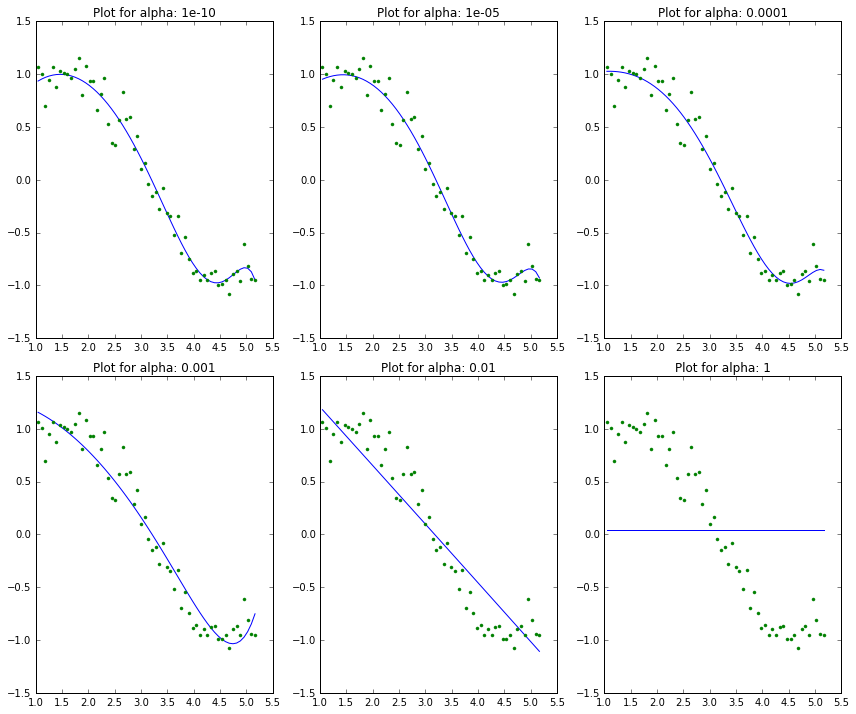

In [35]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [36]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.96,0.22,1.1,-0.37,0.00089,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-10,0.96,0.22,1.1,-0.37,0.00088,0.0016,-0.00012,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.4e-09,1.8e-10,-2e-10,-9.2e-11
alpha_1e-08,0.96,0.22,1.1,-0.37,0.00077,0.0016,-0.00011,-6.4e-05,-6.3e-06,1.4e-06,7.8e-07,2.1e-07,4e-08,5.3e-09,2e-10,-1.9e-10,-9.3e-11
alpha_1e-05,0.96,0.5,0.6,-0.13,-0.038,-0,0,0,0,7.7e-06,1e-06,7.7e-08,0,0,0,-0,-7e-11
alpha_0.0001,1,0.9,0.17,-0,-0.048,-0,-0,0,0,9.5e-06,5.1e-07,0,0,0,-0,-0,-4.4e-11
alpha_0.001,1.7,1.3,-0,-0.13,-0,-0,-0,0,0,0,0,0,1.5e-08,7.5e-10,0,0,0
alpha_0.01,3.6,1.8,-0.55,-0.00056,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,37,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


Here, **even for a small value of alpha, a significant number of parameters are zero**. This is called sparsity.

The difference between ridge and lasso lies in the fact that the derivative that is calculted during the gradient descent process is not defined everywhere due to the presence of the absolute value in the objective/cost function. Instead, a process known as **coordinate descent** is used. It begins by setting all parameters to zero, then updating the $j$*th* parameter with a value that minimizes the cost and repeats this process iteratively for all other features. The update rule considers the predicted outcome with all features excecpt the $j$*th*. If the residual is sufficiently small, then this feature is not important to the outcome so the parameter is left as zero.

The following image describes the difference in the possible parameter values for the non-regularizated, ridge, LASSO regression. Here, $\lambda$ represents a small tolerance value where the residual is small enough to declare that the given feature has little influence on the model.

<img src="parameters.png">